# LAB 02: Cryptocurrency Daily Market Price

## Thông tin người thực hiện
|  MSSV |Họ và tên   |
|---|---|
|  20120095 |Ngô Quang Hưng   |
|  20120519|Nguyễn Thị Thúy Liễu   |
|  20120540|Võ Hoàng Thảo Nguyên   |
|  20120633|Viên Hải Yến   |
|  20120634|Lê Minh Trí   |


## Mô tả đồ án

Tìm hiểu mối quan hệ giữa các trường dữ liệu thực tế thông qua việc trực quan hóa dữ liệu Thị trường tiền điện tử hàng ngày.

Import các thư viện

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime, timedelta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.tight_layout()
import warnings
warnings.filterwarnings('ignore')

<Figure size 640x480 with 0 Axes>

### <span style="color:yellow"> A. Thu thập dữ liệu</span>

#### Ngữ cảnh thực hiện tìm kiếm dữ liệu

Đây là thời đại công nghê số nơi mà thị trường điện tử phát triển mạnh mẽ và được nhiều người biết đến. Dataset này cung cấp thông tin chi tiết về lịch sử giao dịch của các loại tiền điện tử, bao gồm các chỉ số quan trọng như giá mở, giá cao, giá thấp, giá đóng cửa, khối lượng giao dịch và vốn hóa thị trường, ...\
Bộ dữ liệu lưu trữ trong khoảng thời gian từ năm 2013-2018 về nhiều loại tiền ảo ở các thời gian gần nhau để thấy được sự chênh lệch trong các khoảng thời gian xác định.

#### Chủ đề

Time-series, phân tích độ trending, rủi ro, tầm phát triển, thay đổi của thị trường Crypo từ năm 2013-2018

#### Nguồn

Dataset trên Kaggle: [Tại đây](https://www.kaggle.com/datasets/jessevent/all-crypto-currencies?fbclid=IwAR1ClYMb9dVjpBwOPuqJfWkRf5gLsukrWscsuV_okKL4X6Q9e7JkjcGtdQ8)

#### Người ta có cho phép sử dụng dữ liệu như thế này hay không?

Theo thông tin License của dữ liệu, người dùng được phép tự do chia sẻ, sửa đổi và sử dụng dữ liệu trong khi duy trì sự tự do tương tự cho người dùng khác.

#### Người ta đã thu thập dữ liệu này như thế nào? Phương pháp thực hiện là gì?

Phương pháp thu thập dữ liệu:
- Thu thập thông tin bằng code và sử dụng CRAN của R (lưu trữ trực tuyến thường được sử dụng với R packages và các tài nguyên R khác).
- Do đó, có những cải tiến đáng kể về cách một số chuyển đổi trường đã được thực hiện và dữ liệu được làm sạch.

#### Đọc dữ liệu

In [2]:
# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data_set= pd.read_csv('./dataset/crypto-markets.csv', parse_dates=['date'], index_col='date')
df=data_set.copy()
df.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


----

### <span style="color:yellow"> B. Khám phá dữ liệu</span>

#### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Mỗi dòng chứa dữ liệu về một loại tiền ảo và các thông tin liên quan trong một thời điểm cụ thể. Thông tin bao gồm: thời gian công bố, tên loại tiền, tên viết tắt, xếp hạng, giá mở cửa, giá đóng cửa, giá cao nhất giá thấp nhất, khối lượng giao dịch, vốn hoá thị trường, chênh lệch giữa giá mua và giá bán ,tỉ lệ đóng.

- ví dụ dòng 1: tiền bitcoin có xếp hạng là 1, giá mở là 135.3, giá đóng là 134.21, giá cao nhất là 135.98, giá thấp nhất là 132.10, khối lượng giao dịch là 0, vốn hoá thị trường là 1.488567e+09, tỉ lệ đóng 0.5438, chênh lệch giá mua và giá bán là 3.88.

- Không có tình trạng các dòng có ý nghĩa khác nhau.


#### Mỗi cột có ý nghĩa gì?

In [3]:
column=11
print("column ", column,": ", df.columns[column])
print("size: ", len(df.loc[:, df.columns[column]]))
print("number of values: ", len(df.loc[:, df.columns[column]].unique()))

arr= df.loc[:, df.columns[column]].unique()

nanIndex=-1
for index in range(len(arr)):
    if isinstance(arr[index], float) and np.isnan(arr[index]):
        nanIndex=index
        break
if nanIndex != -1:
    arr=np.delete(arr,nanIndex)

print("number of values (without nan): ", len(arr))
print("data (without nan) : ", arr[0])
print("data (without nan) : ", arr[1])
print("data (without nan) : ", arr[2])
print("data (without nan) : ", arr[3])

print(min(arr))
print(max(arr))
print(np.mean(arr))
# print("data (without nan) : ", ', '.join(arr))

column  11 :  spread
size:  942297
number of values:  12454
number of values (without nan):  12454
data (without nan) :  3.88
data (without nan) :  13.49
data (without nan) :  12.88
data (without nan) :  32.17
0.0
1770563.0
8472.755946683797


#### Thông tin mỗi cột

- Slug: Tên loại tiền
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 2071
    - Một số dữ liệu: bitcoin, ripple, ethereum, stellar, bitcoin-cash,...
- symbol: tên viết tắt của loại tiền
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 2005
    - Một số dữ liệu:  BTC, XRP, ETH, XLM, BCH, EOS, LTC, USDT, BSV, ADA,...
- name: tên loại tiền
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 2071
    - Một số dữ liệu:  Bitcoin, XRP, Ethereum, Stellar, Bitcoin Cash, EOS,...
- ranknow: xếp hạng
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 2068
    - Một số dữ liệu:  1,2,3,...,2070,2071,2072.
- open: giá mở
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 266140
    - Một số dữ liệu:  135.3, 134.44, 144.,...,23320.9, 24543.53, 22872.09
    - min: 2.5e-09
    - max: 2298390.0
    - Trung bình: 1222.88
- high: gía cao nhất
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 269676
    - Một số dữ liệu:  135.98, 147.49, 146.93, ... ,25235.1,  24582.47, 23086.98
    - min: 3.2e-09
    - max: 2926100.0
    - Trung bình: 1417.51
- low: gía thấp nhất
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 263008
    - Một số dữ liệu:  132.1, 134., 134.05, ... ,19888.1,  21457.95, 19040.91
    - min: 2.5e-10
    - max: 2030590.0
    - Trung bình: 1052.11
- close: gía đóng
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 265887
    - Một số dữ liệu:  134.21, 144.54, 139., ... ,24442.7,  22839.44, 21136.72
    - min: 2e-10
    - max: 2300740.0
    - Trung bình: 1215.35
- volume: khối lượng giao dịch
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 300528
    - Một số dữ liệu:  0, 46862700.0, 32505800.0, 19011300.0,...
    - min: 0.0
    - max: 23840899072.0
    - Trung bình: 27175312.58
- market: vốn hoá thị trường
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 660996
    - Một số dữ liệu:  1488566728.0, 1603768865.0, 1542813125.0, 1298954594.0,...
    - min: 0.0
    - max: 326502485530.0
    - Trung bình: 245833831.28
- spread: chênh lệch giá mua và giá bán
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 12454
    - Một số dữ liệu:  3.88, 13.49, 12.88, 32.17,...
    - min: 0
    - max: 1770563.0
    - Trung bình: 8472.75
- close_ratio: tỉ lệ đóng
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 10022
    - Một số dữ liệu:  0.5438, 0.7813, 0.3843, 0.2882,...
    - min: -1.0
    - max: 1
    - Trung bình: 0.49

#### Mỗi cột hiện đang có kiểu dữ liệu gì?

In [4]:
df.dtypes

slug            object
symbol          object
name            object
ranknow          int64
open           float64
high           float64
low            float64
close          float64
volume         float64
market         float64
close_ratio    float64
spread         float64
dtype: object

In [5]:
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    print(col,":",set(df[col].apply(type)))

slug : {<class 'str'>}
symbol : {<class 'str'>}
name : {<class 'str'>}


#### Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

Các cột đã ở kiểu dữ liệu phù hợp để phân tích

#### Phân bố dữ liệu ở các cột

##### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

In [6]:
numerical_des = df.describe()
missing_ratio = pd.DataFrame({col : df[col].isnull().sum() / len(df) for col in numerical_des.columns}, index=["missing_ratio"])
pd.concat([numerical_des,missing_ratio])

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,942297.000000,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,942297.000000,9.422970e+05
mean,1000.170608,3.483522e+02,4.085930e+02,2.962526e+02,3.461018e+02,8.720383e+06,1.725060e+08,0.459499,1.123400e+02
std,587.575283,1.318436e+04,1.616386e+04,1.092931e+04,1.309822e+04,1.839802e+08,3.575590e+09,0.326160,6.783713e+03
min,1.000000,2.500000e-09,3.200000e-09,2.500000e-10,2.000000e-10,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00
25%,465.000000,2.321000e-03,2.628000e-03,2.044000e-03,2.314000e-03,1.750000e+02,2.958100e+04,0.162900,0.000000e+00
50%,1072.000000,2.398300e-02,2.680200e-02,2.143700e-02,2.389200e-02,4.278000e+03,5.227960e+05,0.432400,0.000000e+00
75%,1484.000000,2.268600e-01,2.508940e-01,2.043910e-01,2.259340e-01,1.190900e+05,6.874647e+06,0.745800,3.000000e-02
max,2072.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.265025e+11,1.000000,1.770563e+06
missing_ratio,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00


##### Với mỗi cột không có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

In [7]:
cate_rows=["missing_ratio","nums_of_vals", "num_diff_vals","diff_vals"]
data_cate={}

for col in df.columns:
    if df[col].dtype == 'object':
        row=[]
        row.append(round(df[col].isnull().sum()/len(df[col])*100,3))
        data_cate.update({f'{col}':row})

        row.append(len(df[col].notna()))
        row.append(len(df[col][df[col].notna()].unique()))
        row.append(np.array(df[col][df[col].notna()].unique()))
        data_cate.update({f'{col}':row})

cate_col_df=pd.DataFrame(data_cate,index=cate_rows)
display(cate_col_df)

,slug,symbol,name
missing_ratio,0.0,0.0,0.0
nums_of_vals,942297,942297,942297
num_diff_vals,2071,2005,2071
diff_vals,"[bitcoin, ripple, ethereum, stellar, bitcoin-c...","[BTC, XRP, ETH, XLM, BCH, EOS, LTC, USDT, BSV,...","[Bitcoin, XRP, Ethereum, Stellar, Bitcoin Cash..."


#### Tiền xử lí dữ liệu

In [8]:

print(df.info())
print(df.describe())
# kiểm tra missing data
print(df.isna().sum())

# Kiểm tra có dữ liệu bị duplicate không
print(str(df.duplicated().sum()))

# Kiểm ra khoản thời gian của dữ liệu
print(df.index.min())
print(df.index.max())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942297 entries, 2013-04-28 to 2018-11-30
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   slug         942297 non-null  object 
 1   symbol       942297 non-null  object 
 2   name         942297 non-null  object 
 3   ranknow      942297 non-null  int64  
 4   open         942297 non-null  float64
 5   high         942297 non-null  float64
 6   low          942297 non-null  float64
 7   close        942297 non-null  float64
 8   volume       942297 non-null  float64
 9   market       942297 non-null  float64
 10  close_ratio  942297 non-null  float64
 11  spread       942297 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 93.5+ MB
None
             ranknow          open          high           low         close  \
count  942297.000000  9.422970e+05  9.422970e+05  9.422970e+05  9.422970e+05   
mean     1000.170608  3.483522e+02  4.08593

- 0 Nan
- 1380 duplicated
- Dữ liệu thu thập được từ 2013-04-28 đến 2018-11-30

Dữ liệu tương đối sạch ta chỉ cần phải tiền xử lý dữ liệu thêm 1 chút.

In [9]:
# xữ lý dữ liệu duplicate và missing
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)

# chọn lấy dữ liệu từ 2014-01-01 đến 2018-01-01
df=df.loc['2014-01-01':'2018-01-01']
print(df.head(),df.tail())

               slug symbol     name  ranknow    open    high     low   close  \
date                                                                           
2014-01-01  bitcoin    BTC  Bitcoin        1  754.97  775.35  754.97  771.40   
2014-01-02  bitcoin    BTC  Bitcoin        1  773.44  820.31  767.21  802.39   
2014-01-03  bitcoin    BTC  Bitcoin        1  802.85  834.15  789.12  818.72   
2014-01-04  bitcoin    BTC  Bitcoin        1  823.27  859.51  801.67  859.51   
2014-01-05  bitcoin    BTC  Bitcoin        1  858.55  952.40  854.52  933.53   

                volume        market  close_ratio  spread  
date                                                       
2014-01-01  22489400.0  9.403308e+09       0.8062   20.38  
2014-01-02  38489500.0  9.781074e+09       0.6625   53.10  
2014-01-03  37810100.0  9.980135e+09       0.6573   45.03  
2014-01-04  38005000.0  1.047736e+10       1.0000   57.84  
2014-01-05  72898496.0  1.137966e+10       0.8072   97.88                    sl

### <span style="color:yellow"> C. Khám phá mối quan hệ trong dữ liệu</span>

### Xu hướng thị trường tiền ảo giai đoạn 2014-2018:
- Chỉ xét top 5 loại tiền đứng đầu

In [10]:
df_temp=df.copy()
df_temp['market_billion'] = df_temp['market'] / 1000000000
df_temp['volume_million'] = df_temp['volume'] / 1000000000
df_temp['volume_billion'] = df_temp['volume']

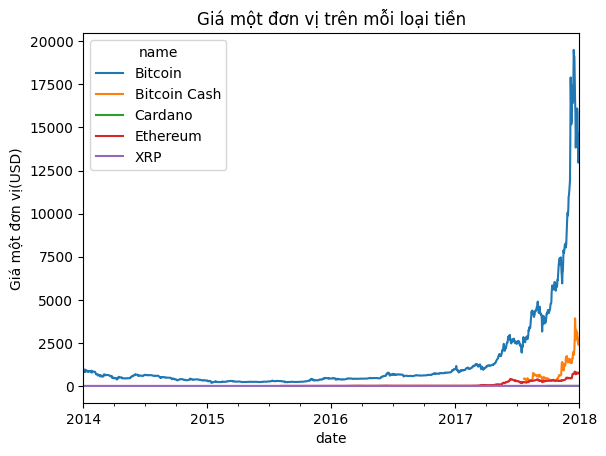

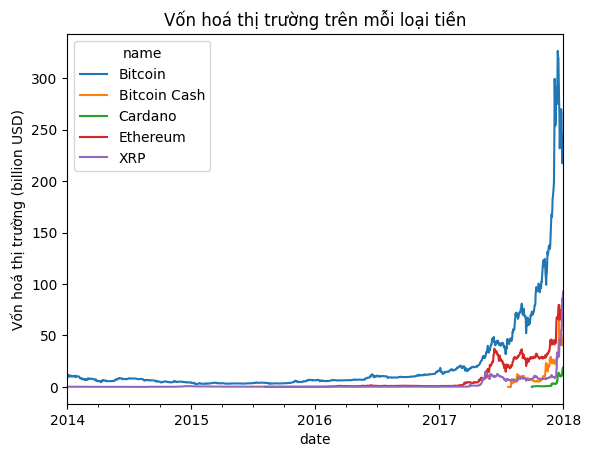

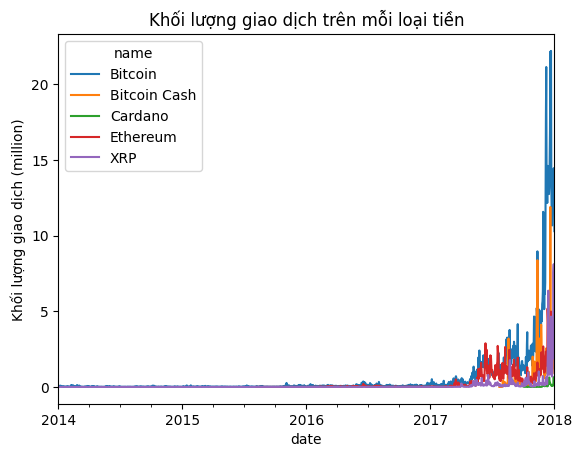

In [11]:
top_5_currency_names = df_temp.groupby(['name'])['market'].last().sort_values(ascending=False).head(5).index
data_top_5_currencies = df_temp[df_temp['name'].isin(top_5_currency_names)]
data_top_5_currencies.head(5)

ax = data_top_5_currencies.groupby(['date', 'name'])['close'].mean().unstack().plot();
ax.set_ylabel("Giá một đơn vị(USD)");
plt.title("Giá một đơn vị trên mỗi loại tiền");

ax = data_top_5_currencies.groupby(['date', 'name'])['market_billion'].mean().unstack().plot();
ax.set_ylabel("Vốn hoá thị trường (billion USD)");
plt.title("Vốn hoá thị trường trên mỗi loại tiền");

ax = data_top_5_currencies.groupby(['date', 'name'])['volume_million'].mean().unstack().plot();
ax.set_ylabel("Khối lượng giao dịch (million)");
plt.title("Khối lượng giao dịch trên mỗi loại tiền");

- Nhóm đồ thị trên đã sử dụng kĩ thuật Static layers: Superimposed Line Charts, được giới thiệu trong bài Facet: 
    - Sử dụng kĩ thuật này để hiển thị toàn bộ 5 đường tương ứng với 5 loại tiền ảo vào cùng một khung đồ thị (xét trong cùng một khung thời gian như nhau đối với từng loại tiền ảo).
    - Khi đó, sẽ có cái nhìn trực quan hơn khi nhìn vào đồ thị, cũng có thể dễ dàng so sánh 5 loại tiền ảo với nhau, điều này sẽ khó có được hiển thị từng đường cho từng loại tiền ảo trên một khung đồ thị riêng biệt. Từ đó, dễ dàng hơn trong việc đưa ra đánh giá.


    
- Nhận xét:
    - Về Giá của mỗi đơn vị tiền tệ: tiền ảo Bitcoin luôn có giá trị cao nhất và trong giai đoạn nửa cuối năm 2017 - đầu năm 2018, giá của Bitcoin cao hơn hẳn các loại tiền còn lại, thậm chí có lúc cao hơn gấp gần 4 lần so với đồng tiền đứng thứ hai.
    - Về Vốn hoá thị trường: tương tự như giá, về vốn hoá thị trường Bitcoin vẫn luôn dẫn đầu, trong giai đoạn nửa cuối năm 2017 - đầu năm 2018, giới hạn thị trường của Bitcoin cao hơn hẳn các loại tiền còn lại, thậm chí có lúc cao hơn gấp gần 3 lần so với đồng tiền đứng thứ hai.
    - Về Khối lượng giao dịch: giai đoạn từ 2014 đến nửa đầu 2017, khối lượng giao dịch của tất cả các loại tiền ảo đều gần như bằng 0. Sang nửa cuối năm 2017 - đầu năm 2018 khối lượng giao dịch tăng lên rõ rệt, đứng đầu là Bitcoin với khối lượng giao dịch đứng đầu.

    => Từ đó, ta thấy giai đoạn từ 2014 đến nửa đầu 2017 thị trường tiền ảo chưa phát triển, nhưng sang giai đoạn nửa cuối năm 2017 - đầu năm 2018 là giai đoạn bùng nổ của thị trường tiền ảo: tiền ảo có giá trị hơn, lượng giao dịch lớn mỗi ngày, đặc biệt là sự tăng trưởng mạnh mẽ của tiền ảo Bitcoin.


#### Giả sử đầu tư 1000 USD tại một số thời điểm thì ROI thu được như thế nào?

In [12]:
df_temp=df
wide_format = df_temp.groupby(['date', 'name'])['close'].last().unstack()

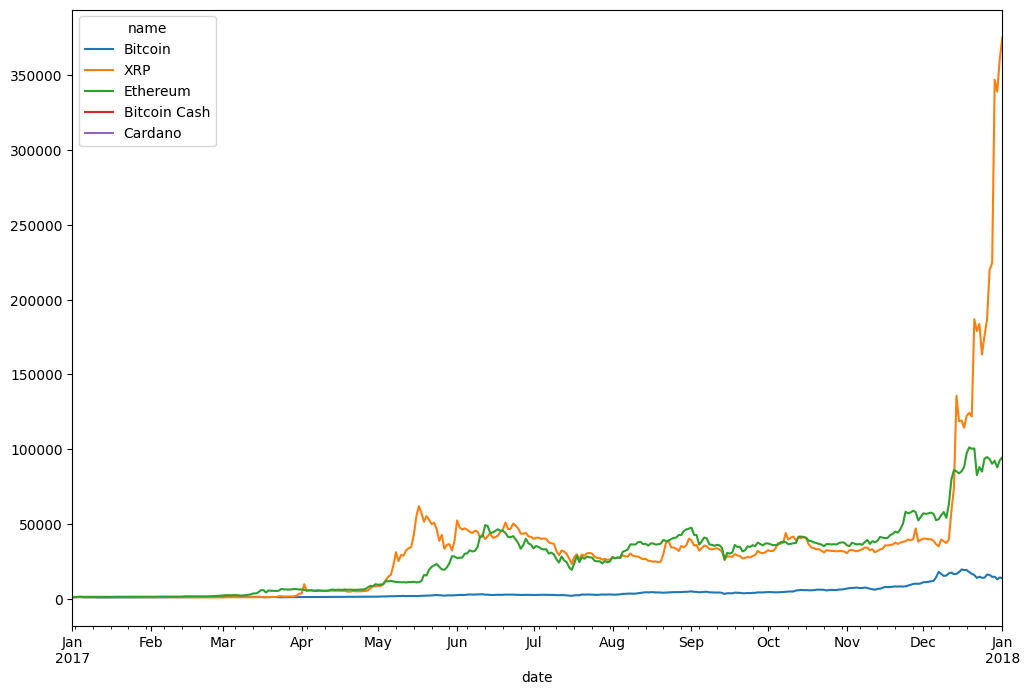

In [13]:
def plot_roi(amount, df):
    ((amount / df.iloc[0]) * df).plot(figsize=(12,8))

wide_format_2017th = wide_format[(wide_format.index.year >= 2017)]
plot_roi(1000, wide_format_2017th[top_5_currency_names])

- Đồ thị trên đã sử dụng kĩ thuật Static layers: Superimposed Line Charts, được giới thiệu trong bài Facet: 
    - Sử dụng kĩ thuật này để hiển thị các đường tương ứng với các loại tiền ảo vào cùng một khung đồ thị (xét trong cùng một khung thời gian như nhau đối với từng loại tiền ảo).
    - Khi đó, sẽ có cái nhìn trực quan hơn khi nhìn vào đồ thị, cũng có thể dễ dàng so sánh các loại tiền ảo với nhau, điều này sẽ khó có được hiển thị từng đường cho từng loại tiền ảo trên một khung đồ thị riêng biệt. Từ đó, dễ dàng hơn trong việc đưa ra đánh giá.

- Nhận xét:
    - Cùng đầu tư một số tiền là 1000 USD cho các loại tiền, nhìn vào đồ thị ta thấy ROI (Hệ số thu nhập trên đầu tư) của tiền ảo XRP có nhiều biến động và cao nhất, hơn hẳn các loại tiền kháng vào giai đoạn tháng 12/2017.
    - Còn với tiền ảo Ethereum thì ROI phát triển khá ổn định, có xu hướng tăng dần.
    - Trong khi đó, tiền ảo Bitcoin lại gây thấy vọng khi lượng ROI thấp hơn hẳn 2 loại tiền còn lại và phát triển khá chậm.

### Tổng khối lượng giao dịch theo từng loại tiền ảo:

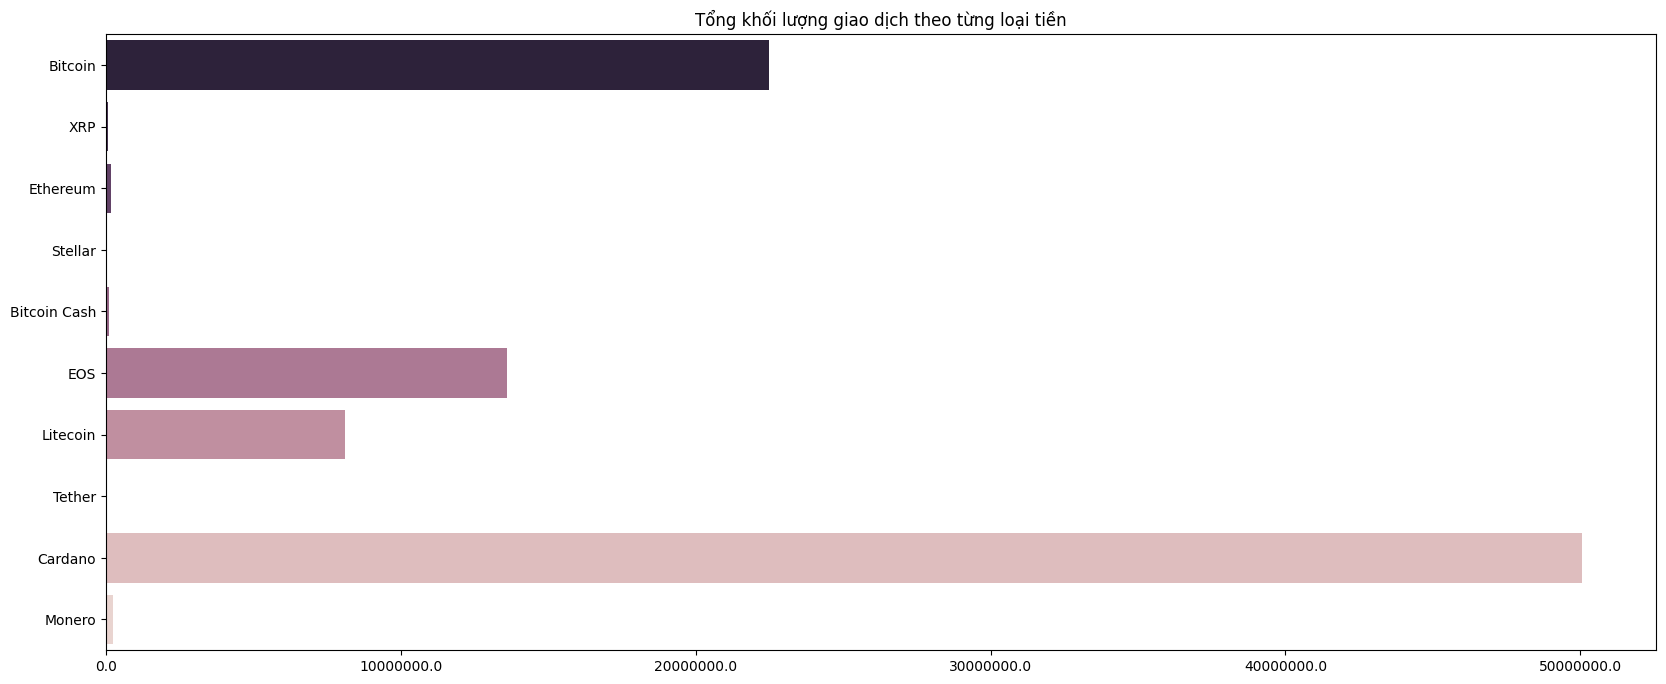

In [14]:
df_temp=df.copy()
currency  = []
volume = []
name = df_temp['name'].unique()
x_currencies = name[:10]
for i, cn in enumerate(x_currencies):
     filtered = df_temp[(df_temp['name']==str(cn))]
     currency.append(str(cn))
     volume.append(filtered['volume'].values[0])
        
f, ax = plt.subplots(figsize=(20, 8)) 
g = sns.barplot( y = currency, x = volume, palette=sns.cubehelix_palette(10, reverse=True))
plt.title("Tổng khối lượng giao dịch theo từng loại tiền")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

- Đồ thị trên đã sử dụng kĩ thuật Item Aggregation, cụ thể là đồ thị histogram, được giới thiệu trong bài Reduce: 
    - Sử dụng kĩ thuật này để hiển thị các cột tương ứng với các loại tiền ảo. Với các loại tiền ảo là các thùng chứa, còn số lượng chứa trong thùng là tổng khối lượng giao dịch của từng loại tiền ảo.
    - Khi đó, sẽ có cái nhìn trực quan hơn khi nhìn vào đồ thị, cũng có thể dễ dàng so sánh các loại tiền ảo với nhau. Cách trực quan này giúp dễ so sánh về tổng số lượng giao dịch hơn so với việc không gom nhóm các loại tiền.
    - Từ đó, dễ dàng hơn trong việc đưa ra đánh giá.

- Nhận xét:
    - Trong giai đoạn đang xét, ta thấy tổng số lượng giao dịch của tiền ảo Cardano cao nhất, cao gấp 2 lần so với loại tiền thứ hai là Bitcoin. Trong khi đó, khoảng cách giữa các loại tiền thứ 2, 3, 4 không rõ ràng như khoảng cách của tiền ảo Cardano và Bitcoin.
    - Các loại tiền ảo còn lại gần như tổng khối lượng giao dịch gần như bằng không.
    - Từ đó, ta thấy xu hướng giao dịch trong giai đoạn này là tiền Cardano.

### Diễn biến giá mở của các loại tiền ảo trong từng giai đoạn

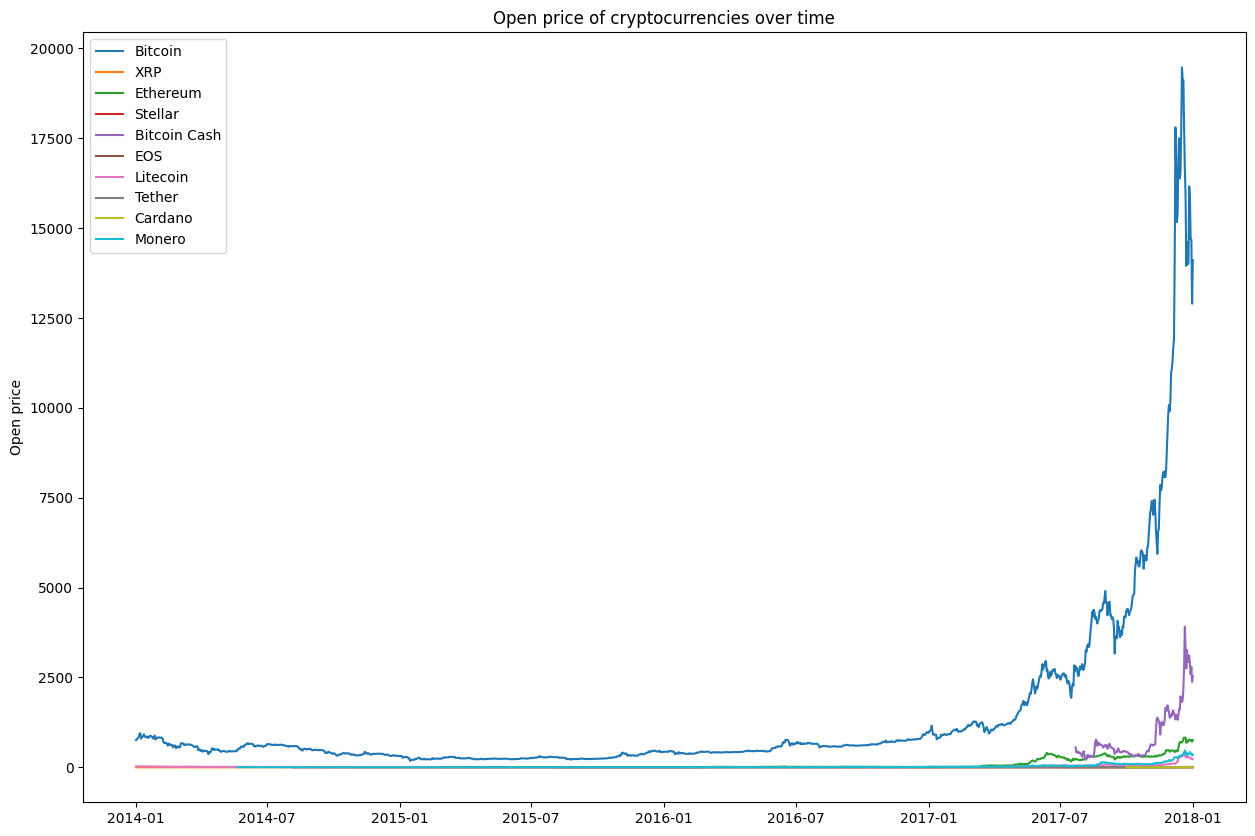

In [15]:


name = df_temp['name'].unique()
currency  = name[:10]
df_openPrice=df_temp[(df_temp['name'].isin(currency))]
# print(df_openPrice['date'])



df_openPrice = df_openPrice[["name", "open"]]
df_openPrice = df_openPrice.sort_index()

plt.figure(figsize=(15, 10))

for name in currency:
    data = df_openPrice[df_openPrice["name"] == name]
    plt.plot(data.index, data["open"], label=name)
plt.ylabel("Open price")
plt.title("Open price of cryptocurrencies over time")
plt.legend()
plt.show()


- Đồ thị trên đã sử dụng kĩ thuật Static layers: Superimposed Line Charts, được giới thiệu trong bài Facet: 
    - Sử dụng kĩ thuật này để hiển thị các đường tương ứng với các loại tiền ảo vào cùng một khung đồ thị (xét trong cùng một khung thời gian như nhau đối với từng loại tiền ảo).
    - Khi đó, sẽ có cái nhìn trực quan hơn khi nhìn vào đồ thị, cũng có thể dễ dàng so sánh các loại tiền ảo với nhau, điều này sẽ khó có được hiển thị từng đường cho từng loại tiền ảo trên một khung đồ thị riêng biệt. Từ đó, dễ dàng hơn trong việc đưa ra đánh giá.

- Nhận xét:
    - Ta có thể dễ dàng thấy được, giá mở không biến động nhiều trong giai đoạn từ 2014-01 đến 2017-01. Tuy nhiên, sau khoảng thời gian trên, giá mở các loại tiền ảo tăng chóng mặt, đặt biệt là Bitcoin với chiều tăng gần như dựng đứng. Điều đó cho thấy có một sự biến động vào năm 2017.

### Tần suất giá đóng nhỏ hơn giá mở của 10 loại tiền ảo đầu tiên

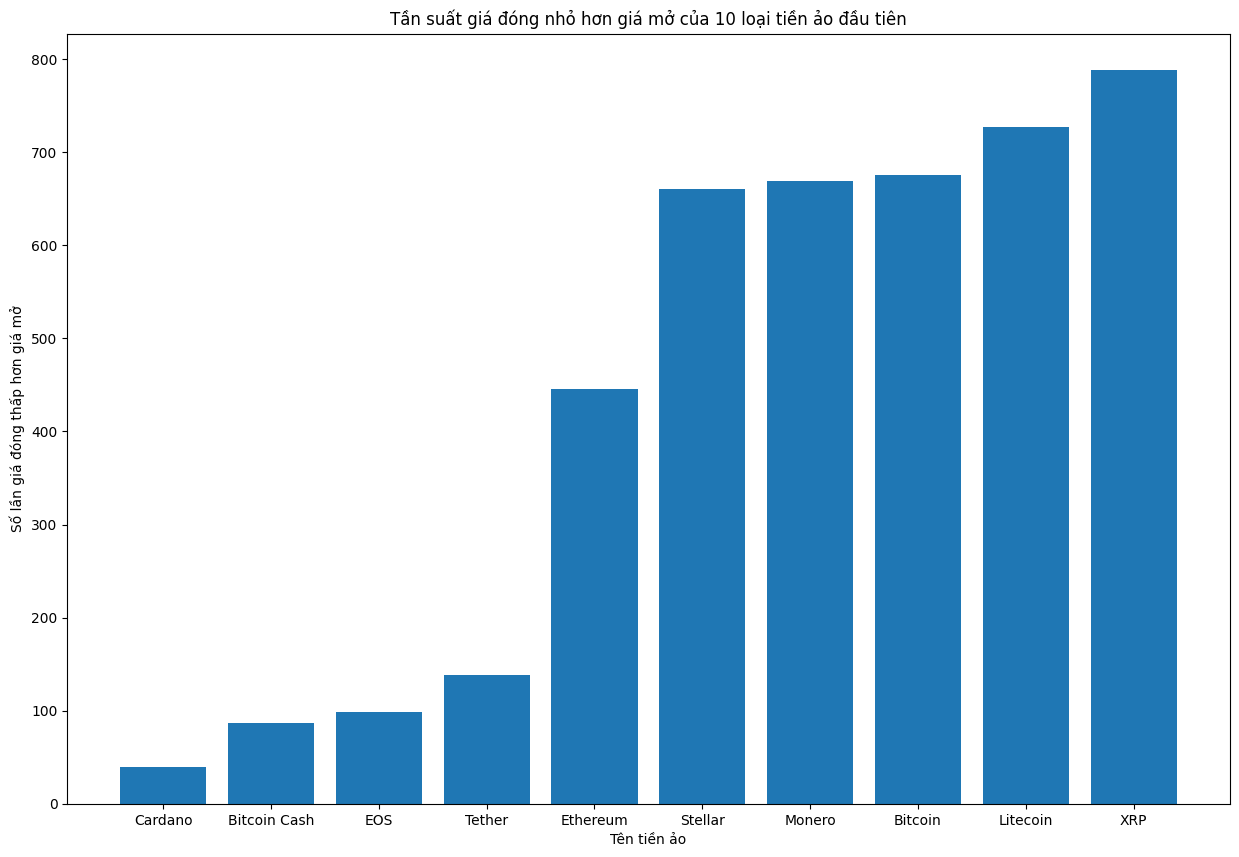

In [16]:
df_tmp= df.copy()
name = df_tmp['name'].unique()
currency  = name[:10]
df_tmp=df_tmp[(df_tmp['name'].isin(currency))]

freq = (df_tmp['close'] < df_tmp['open']).groupby(df_tmp['name']).sum()
freq = freq.sort_values(ascending=True)

plt.figure(figsize=(15, 10))

# freq.sort_values(freq.values)
# vẽ đồ thị cột
plt.bar(freq.index, freq.values)

# đặt tên cho các trục và tiêu đề
plt.xlabel('Tên tiền ảo')
plt.ylabel('Số lần giá đóng thấp hơn giá mở')
plt.title('Tần suất giá đóng nhỏ hơn giá mở của 10 loại tiền ảo đầu tiên')

# hiển thị đồ thị
plt.show()


- Đồ thị trên đã sử dụng kĩ thuật Item Aggregation, cụ thể là đồ thị histogram, được giới thiệu trong bài Reduce: 
    - Sử dụng kĩ thuật này để hiển thị các cột tương ứng với các loại tiền ảo. Với các loại tiền ảo là các thùng chứa, còn số lượng chứa trong thùng là số lần giá đóng thấp hơn giá mở của từng loại tiền ảo.
    - Khi đó, sẽ có cái nhìn trực quan hơn khi nhìn vào đồ thị, cũng có thể dễ dàng so sánh các loại tiền ảo với nhau. Cách trực quan này giúp dễ so sánh về tổng số lượng giao dịch hơn so với việc không gom nhóm các loại tiền. Từ đó, dễ dàng hơn trong việc đưa ra đánh giá.

- Nhận xét:
    - Trong 10 loại tiền ảo đầu tiên, loại tiền ảo có số lần chênh lệch giá đóng với giá mở lớn nhất là XRP với khoảng 800 lần chênh lệch. Trong khi đó, Cardano thì có số lần chênh lệch cự kì ít, chỉ khoảng 50 lần chênh lệch.
    - Từ đó ta cũng có thể dễ dàng nhận thấy, nếu thực hiện giao dịch mua bán trên ngày, trong 10 loại tiền ảo đầu tiên thì chọn XRP sẽ có khả năng thu lợi được nhiều nhất, bởi vì số lần tăng giá là khá cao.

### Mô tả chuyển động giá của một chứng khoán theo thời gian: **BTC, ETH, ADA, BNB, DOGE**

In [17]:
df_temp=df.reset_index()
df_temp.columns

Index(['date', 'slug', 'symbol', 'name', 'ranknow', 'open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread'],
      dtype='object')

In [18]:
numOfCandle = 150
symbols = ['BTC', 'ETH', 'ADA', 'BNB', 'DOGE']
df_filtered = df_temp[df_temp['symbol'].isin(symbols)]
symbol_buttons = []


GRAPH_PER_SYMBOL = 2
for index, symbol in enumerate(symbols):
    df_symbol = df_temp[df_temp['symbol'] == symbol]

    vis = [False] * len(symbols) * GRAPH_PER_SYMBOL
    for i in range(GRAPH_PER_SYMBOL):
        vis[index*GRAPH_PER_SYMBOL + i] = True

    symbol_buttons.append({'label': symbol,
                           'method': 'update',
                           'args': [{'visible': vis},
                                    {'title': symbol + " Charts"}
                                    ]}
                          )

fig = make_subplots(rows=3,
                    cols=1,
                    shared_xaxes=True,
                    # specs=[[{"rowspan": 2}, {"rowspan": 2}], [{"rowspan": 1}, {"rowspan": 1}] , [{},{}]]
                    specs=[[{"rowspan": 2}], [{"rowspan": 1}], [{}]],
                    subplot_titles=('Candle Chart', '','Volume')
                    )
for symbol in symbols:
    df_symbol = df_temp[df_temp['symbol'] == symbol]
    df_symbol_by_day = df_symbol.sort_index(ascending=False)[:numOfCandle]
    fig.add_trace(
        go.Candlestick(x=df_symbol_by_day['date'],
                       open=df_symbol_by_day['open'],
                       high=df_symbol_by_day['high'],
                       low=df_symbol_by_day['low'],
                       close=df_symbol_by_day['close'],
                       showlegend=False
                       ),
        row=1,
        col=1)
    colors=np.where(df_symbol_by_day['close'] > df_symbol_by_day['open'], "green", "red")
    fig.add_trace(
        go.Bar(x=df_symbol_by_day['date'],
               y=df_symbol_by_day["volume"],
               showlegend=False,
               marker=dict(color=colors)
               ),
        row=3,
        col=1)
for small_fig, visible in zip(fig.data, symbol_buttons[0]['args'][0]['visible']):
    small_fig.visible = visible
fig.update_layout(
    updatemenus=[dict(type='dropdown',
                      x=1.0,
                      y=1.108,
                      showactive=True,
                      active=0,
                      buttons=symbol_buttons)],
    title=dict(text=symbol_buttons[0]['args'][1]['title']),
    spikedistance=100,
    height=650
)
fig.layout["xaxis3"]["rangeslider"]["visible"] = True
fig.layout["xaxis"]["rangeslider"]["visible"] = False


fig.show()


- Đồ thị trên đã sử dụng kĩ thuật Navigate (Range Slider), được giới thiệu trong bài Manipulate View:
    - Kĩ thuật này cho phép người dùng tập trung vào các khoảng thời gian cụ thể bằng cách điều chỉnh phạm vi ngày cụ thể trên Range Slider. Điều này rất hữu ích khi dữ liệu bao phủ một khoảng thời gian dài, giúp người dùng tập trung vào các xu hướng hoặc sự kiện cụ thể.
    - Ngoài ra, việc sử dụng Range Slider còn giúp giảm thiểu sự rối loạn trong biểu đồ bằng cách chỉ hiển thị một phần của dữ liệu mỗi lần. Điều này giúp người dùng dễ dàng giải thích biểu đồ trong phạm vi xác định và phân tích các xu hướng một cách dễ dàng hơn.

**Nhận xét:**
- Xét theo thị trường từ khoảng tháng 9 năm 2017 đến tháng 1 năm 2018, thị trường chứng khoáng có sự thay đổi chung. Cụ thể:
  - Vào tháng 9, thị trường đang có mực tăng trưởng tốt, trừ EDA
  - Từ tháng 10 đến tháng 11 thì có sự sụt giảm mạnh, chiều hướng giảm bao trùm toàn bộ dữ liệu trong các tháng này,
  - Bắt đầu từ nửa sau tháng 12, thị trường có mức nhiệt tăng lên trở lại, tăng dần và đạt tới ngưỡng cao hơn thời điểm trước đó gấp nhiều lần ở hầu hết mọi chứng khoán. 

### So sánh sự tăng trưởng của từng nhóm chứng khoán dựa theo vốn hóa thị trường. Mô tả sự sự chuyển động của một số loại tiền tiêu biểu trong từng nhóm.

In [19]:
# Group the data by symbol and date, and calculate the average daily market price

df_cap = df_temp.groupby(['symbol', 'date'])['market'].mean().reset_index()

# bins = [0, 1e9, 1e10, 1e11, float('inf')]
# labels = ['< 1B', '1B - 10B', '10B - 100B', '> 100B']
bins = [0, 1e9, 1e10, float('inf')]
labels = ['< 1B', '1B - 10B', '> 10B']
# Group the symbols by market capitalization
df_label = df_temp.groupby('symbol')['market'].max().reset_index().sort_values(by='market', ascending=False)
df_label['label'] = pd.cut(df_label['market'], bins=bins, labels=labels)
df_label = df_label.dropna()


In [20]:
legend_colors = ["Blue", "Crimson", "Green"]
numOfSymbol_per_label = 3
labels.reverse()

fig = go.Figure()

# All (grouped)
for index_color, label in enumerate(labels):
    symbols = df_label[df_label['label'] == label]['symbol'].to_list()
    df_of_label = df_cap[df_cap['symbol'].isin(symbols)]
    df_of_label = df_of_label.groupby('date')['market'].mean().reset_index()
    fig.add_trace(
        go.Scatter(x=df_of_label['date'], y=df_of_label['market'], mode='lines',
                   line=dict(color=legend_colors[index_color]),
                   name=label, legendgroup="group")
    )

# Each label
for index, label in enumerate(labels):
    temp = df_label[df_label['label'] == label].sort_values(
        by='market', ascending=False)
    symbols = temp[:min(len(temp), numOfSymbol_per_label)]['symbol'].to_list()

    small_figs = []
    for color_index, symbol in enumerate(symbols):
        df_of_symbol = df_cap[df_cap['symbol'] == symbol]
        fig.add_trace(
            go.Scatter(x=df_of_symbol['date'], y=df_of_symbol['market'], mode='lines',
                       line=dict(color=legend_colors[color_index]),
                       name=symbol,
                       legendgroup=f'group{index+2}')
        )

buttons = [{'label': "All",
            'method': 'update',
            'args': [{'visible': [True, True, True] + [False] * numOfSymbol_per_label * len(labels)},
                     {'title': "All (Grouped)"}
                     ]}]
for index, label in enumerate(labels):
    vis = [False] * (len(labels) + numOfSymbol_per_label*len(labels))
    for i in range(numOfSymbol_per_label):
        vis[len(labels) + index*numOfSymbol_per_label + i] = True
    buttons.append({'label': label,
                    'method': 'update',
                    'args': [{'visible': vis},
                             {'title': f'Top {numOfSymbol_per_label} ' + f'({label})'}
                             ]}
                   )
fig.update_layout(
    updatemenus=[dict(type='dropdown',
                      x=1.0,
                      y=1.108,
                      showactive=True,
                      active=0,
                      buttons=buttons)],
    title=dict(text=buttons[0]['args'][1]['title']),
)
for small_fig, visible in zip(fig.data, buttons[0]['args'][0]['visible']):
    small_fig.visible = visible
fig.show()


- Đồ thị trên đã sử dụng kĩ thuật Item Aggregation, cụ thể là đồ thị histogram, được giới thiệu trong bài Reduce:
    - Khi có quá nhiều biểu tượng, chúng có thể gây rối loạn và khó hiểu. Tuy nhiên, bằng cách nhóm các biểu tượng theo vốn hóa thị trường tương đồng, ta đã có thể giảm bớt sự rối loạn và tập trung vào các thông tin quan trọng hơn.
    - Đồng thời, việc nhóm các biểu tượng theo vốn hóa thị trường cũng giúp ta dễ dàng nhận ra các xu hướng và tương quan tăng trưởng giữa các nhóm khác nhau. Nhờ đó, ta có thể đưa ra những quyết định và dự đoán chính xác hơn về sự phát triển của thị trường tiền điện tử.

**Nhận xét:**
- Đồ thị trên nhằm mục đích so sánh sự phát triển của 3 nhóm tiền điện tử: < 1B $, 1B $-> 10B $ và >10B $. Đại diện cho nhóm có vốn hóa thị trường thấp, trung bình và cao.
- Xét khoảng thời gian từ 2014-2018, ta có được một số nhận định sau về sự khác biệt giữa 3 nhóm tiền ảo này:
  - Nhóm có vốn hóa thị trường cao luôn luôn nắm giữ lợi thế so với 2 nhóm kia về cả mặt tăng trưởng lẫn mặt khối lượng giao dịch. Gấp rất nhiều lần (đặc biệt là trong thời gian bắt đầu từ 2017 đổ về sau)
  - Nhóm có vốn hóa thị trường cao dẫn đầu là Bitcoin, có sức tăng mạnh mẽ vượt bậc với các loại tiền ảo khác trong cùng nhóm: 326 tỉ trong tháng 12 năm 2017. Nhóm này có xu hướng tăng bắt đầu từ đầu năm 2016 và tăng mạnh từ tháng 6 năm 2017
  - Nhóm có vốn hóa thị trường trung bình có độ tăng trưởng vượt bậc từ tháng 4 năm 2017 và đế 2018 vẫn đang có xu hướng tăng nhanh.
  - Nhóm có vốn hóa thị trường thấp thì có độ tăng trường từ giữa năm 2016, tuy nhiên không ổn định, có sự bất ổn trong quá trình phát triển.

### Bitcoin Price Prediction sử dụng ARIMA Model


Mô hình ARIMA (Autoregressive Integrated Moving Average) là một mô hình thống kê được sử dụng để dự đoán các chuỗi thời gian. Nó kết hợp các thành phần autoregressive (AR), moving average (MA), và integrated (I) để mô hình hóa các mẫu và xu hướng trong dữ liệu chuỗi thời gian.
SARIMAX là một phiên bản mở rộng của mô hình ARIMA (Autoregressive Integrated Moving Average) được sử dụng để mô hình hóa và dự đoán chuỗi thời gian.

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from scipy import stats
from itertools import product

#### Chuẩn bị dữ liệu

In [22]:
df2=data_set.copy()
btc=df2[df2['symbol']=='BTC']


# Drop some columns
btc.drop(['slug', 'volume','symbol','name','ranknow','market', 'close_ratio', 'spread'],axis=1,inplace=True)

btc=btc.resample('M').mean()


#split dataset
train=btc.loc[:'2018-02-28']
test=btc.loc['2018-02-28':,]


Một trong những điều kiện tiền đề khi hồi qui các mô hình chuỗi thời gian đó là chuỗi thời gian phải có tính dừng. Để kiểm định tính dừng chúng ta có thể sử dụng kiểm định `Argument Dickey Fuller` hay còn gọi là kiểm định nghiệm đơn vị.

<Figure size 640x480 with 0 Axes>

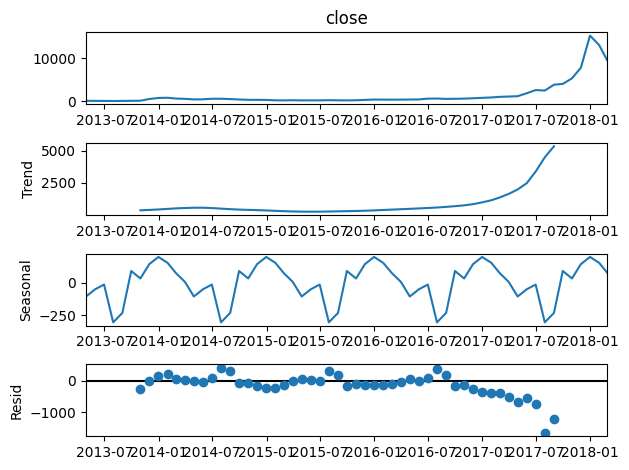

Dickey–Fuller test: p=0.998822


In [23]:
plt.tight_layout()
seasonal_decompose(train.close).plot()
plt.show()
print("Dickey–Fuller test: p=%f" % adfuller(train.close)[1])

Kết quả cho thấy dữ liệu không đảm bảo tính dừng (Stationarity) với độ tinh cậy 99,88% nên ta phải xử lý chuyển đổi dữ liệu về dạng dừng để áp dụng trong mô hình ARIMA. 


Sau khi thử vài cách biến đổi thì ta thấy cách kết hợp biến đổi `Box-Cox` và sai phân bậc 1 cho kết quả một chuỗi dừng có thể sử dụng được.

Dickey–Fuller test: p=0.000007


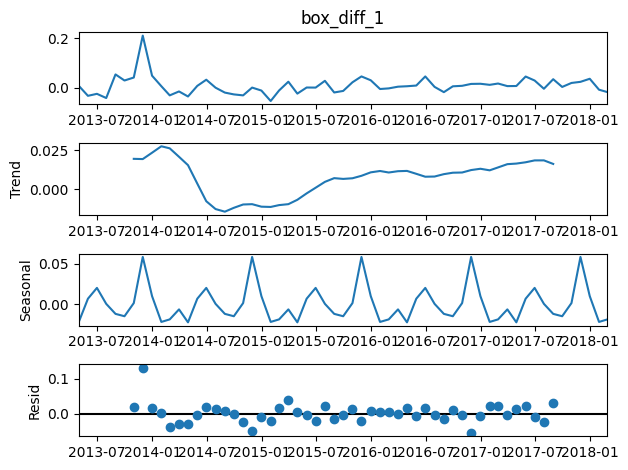

In [24]:
# Box-Cox Transformations
train['close_box'], lmbda = stats.boxcox(train.close)


# Seasonal differentiation
train['box_diff_1'] = train.close_box.diff()
train.loc[0:1,('box_diff_1')]=np.nanmean(train['box_diff_1'])
print("Dickey–Fuller test: p=%f" % adfuller(train.box_diff_1)[1])


# plt.tight_layout()
seasonal_decompose(train.box_diff_1).plot()
plt.show()



#### Xác định các siêu tham số ARIMA(p, d, q)
Các tham số chính bao gồm số lượng các thành phần autoregressive (AR), moving average (MA), và bậc của sự chuyển đổi (difference). Sử dụng các kỹ thuật như autocorrelation function (ACF) và partial autocorrelation function (PACF) để giúp xác định các tham số này.

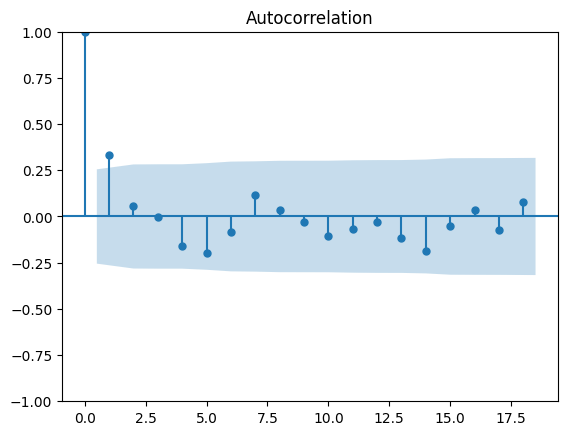

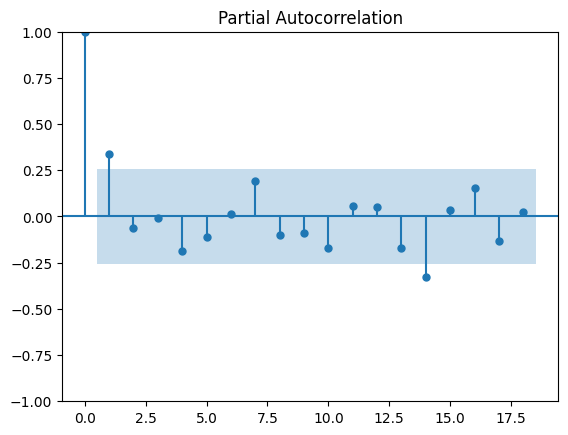

In [25]:
ax1 = plot_acf(train.box_diff_1)
ax2 = plot_pacf(train.box_diff_1)

Qua quan sát có thể chọn ước lượng tham số p<3,q<3 và do ta đã dùng sai phân bậc 1 để biến đổi chuỗi dừng nên d=1.

In [26]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(train.close_box, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [27]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

  parameters         aic
3     (1, 0) -221.502125
1     (0, 1) -221.107279
4     (1, 1) -219.538869
6     (2, 0) -219.530054
2     (0, 2) -219.309765
                               SARIMAX Results                                
Dep. Variable:              close_box   No. Observations:                   59
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 112.751
Date:                Fri, 05 May 2023   AIC                           -221.502
Time:                        11:44:10   BIC                           -217.381
Sample:                    04-30-2013   HQIC                          -219.897
                         - 02-28-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3735      0.151      2.471      0.013      

Kết quả của mô hình tốt nhất có được là SARIMAX(1, 1, 0) với p-value 0.05 đáp ứng được giá trị trong thống kê.

In [28]:
# Vì ban đầu dùng Box-Cox để biến đổi chuỗi dừng nên sau khi chạy model ta phải dùng hàm invboxcox biến đổi ngược lại
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

#### Dự đoán giá Bitcoin

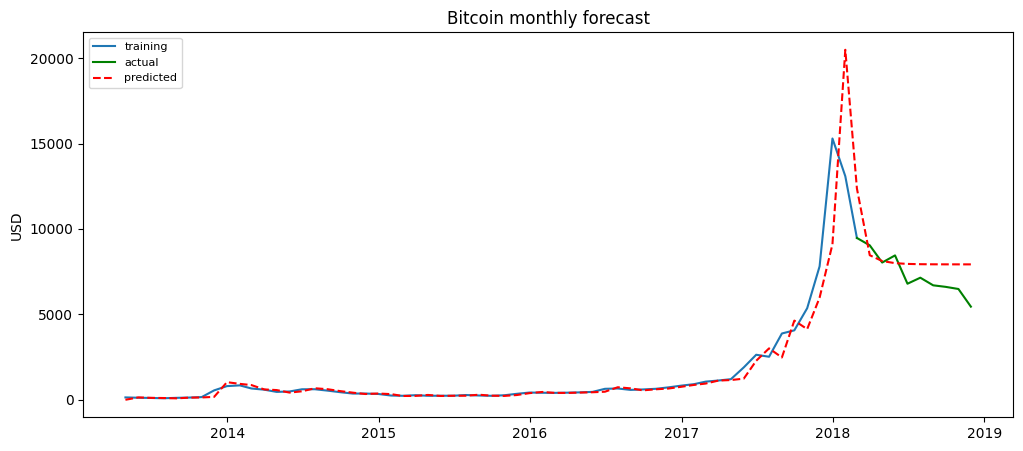

In [29]:
# Forecast
gf= best_model.get_prediction(start=train.index[0], end=test.index[-1])  
fc=gf.predicted_mean
fc=invboxcox(fc,lmbda)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.close, label='training')
plt.plot(test.close, label='actual',color='g')
plt.plot(fc, color='r', ls='--', label='predicted')
plt.title('Bitcoin monthly forecast')
plt.ylabel('USD')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Kết luận và đánh giá mô hình

In [30]:
# Accuracy metrics

fc=fc.loc['2018-02-28':,]

def _measure_metric(y, yhat):
  e = y-yhat
  mse=np.mean(e**2)
  rmse=np.sqrt(mse)
  mae=np.mean(np.abs(e))
  mape=np.mean(e/y)

  print('Mean Square Error: {}'.format(mse))
  print('Root Mean Square Error: {}'.format(rmse))
  print('Mean Absolute Error: {}'.format(mae))
  print('Mean Absolute Percentage Error: {}'.format(mape))
  return mse, rmse, mae, mape

mse, rmse, mae, mape=_measure_metric(test.close, fc)


Mean Square Error: 2235267.389974849
Root Mean Square Error: 1495.0810646834
Mean Absolute Error: 1242.7292749863054
Mean Absolute Percentage Error: -0.15391468393582847


Giải thích ý nghĩa các thông số:

- RMSE: Biên độ giao động của giá trị dự báo xung quanh giá trị thực tế là 1495.08.
- MAE: Trung bình sai số giữa giá trị dự báo và giá trị thực tế là 1242.72.
- MAPE: Sai số giữa giá trị dự báo so với giá trị thực tế bằng 15,39% giá trị thực tế.

Nhận xét:
- Mô hình cho kết quả khá với phần dữ liệu train và khi không có biến động quá lớn.
- Khi có yếu tố bất ngờ gây biến động mạnh trong gian đoạn `01-02/2018` mô hình không dự đoán trước được.
- Ở phần phần dữ liệu test, mô hình chỉ cho kết quả tương đối ổn ở 1 vài dự đoán đầu.

Kết luận:
- Giá Bitcoin có xu hướng biến động mạnh, với những biến đổi giá lớn và không tuân theo phân phối chuẩn. Điều này có thể làm khó khăn cho mô hình ARIMA, vì mô hình này giả định sự ổn định và phân phối chuẩn của dữ liệu.
- Giá Bitcoin có thể bị ảnh hưởng bởi các yếu tố bất ngờ như tin tức, quy định, sự kiện toàn cầu, và các yếu tố thị trường khác. Mô hình ARIMA không thể dự đoán những yếu tố này và có thể không phản ánh đầy đủ các biến động không mong đợi trong giá Bitcoin.
- Quá khứ không phản ánh tương lai: Mô hình ARIMA dựa trên dữ liệu quá khứ để dự đoán tương lai. Tuy nhiên, trong trường hợp của Bitcoin, quá trình lịch sử không đảm bảo rằng mô hình ARIMA sẽ hoạt động hiệu quả trong tương lai. Việc sử dụng mô hình ARIMA cho dự đoán giá Bitcoin cần được xem như một công cụ tham khảo và cần được kết hợp với các phân tích và đánh giá khác.